In [ ]:
import cv2
import matplotlib.pyplot as DHQuan

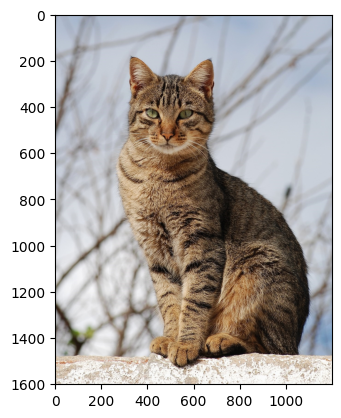

In [20]:
img = cv2.imread('hinh1.jpg')
img = img[:,:,::-1]
DHQuan.imshow(img)


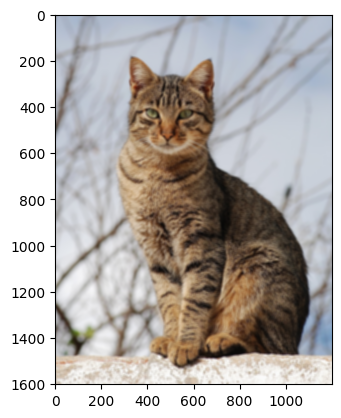

In [23]:
#1. 
img2 = cv2.blur(img, (11, 11))
DHQuan.imshow(img2)


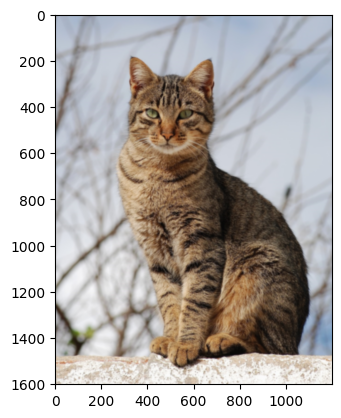

In [24]:
#2. 
img3 = cv2.GaussianBlur(img, (11, 11),0)
DHQuan.imshow(img3)


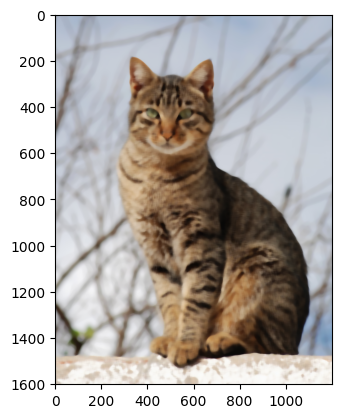

In [25]:
#3. 
img4 = cv2.medianBlur(img, 15, 0)
DHQuan.imshow(img4)


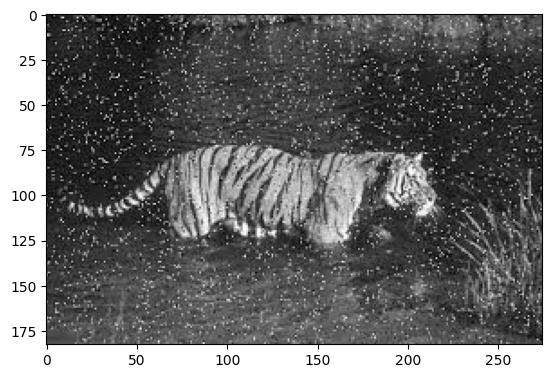

In [26]:
img = cv2.imread('pepper_noise02.jpg')
img = img[:,:,::-1]
DHQuan.imshow(img)

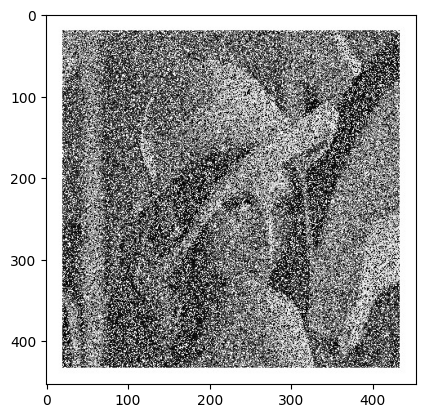

In [27]:
img = cv2.imread('pepper_noise01.jpg')
img = img[:,:,::-1]
DHQuan.imshow(img)

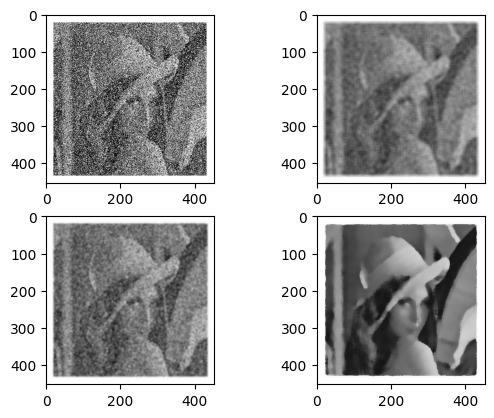

In [32]:
#4
img_pepper01 = cv2.imread('pepper_noise01.jpg')
img_pepper01 = img_pepper01[:,:,::-1]   
DHQuan.subplot(2,2,1)
DHQuan.imshow(img_pepper01)

img_pepper01a = cv2.blur(img_pepper01, (11, 11))
DHQuan.subplot(2,2,2)
DHQuan.imshow(img_pepper01a)

img_pepper01b = cv2.GaussianBlur(img_pepper01, (11, 11), 0)
DHQuan.subplot(2,2,3)
DHQuan.imshow(img_pepper01b)

img_pepper01c = cv2.medianBlur(img_pepper01, 15)
DHQuan.subplot(2,2,4)
DHQuan.imshow(img_pepper01c)

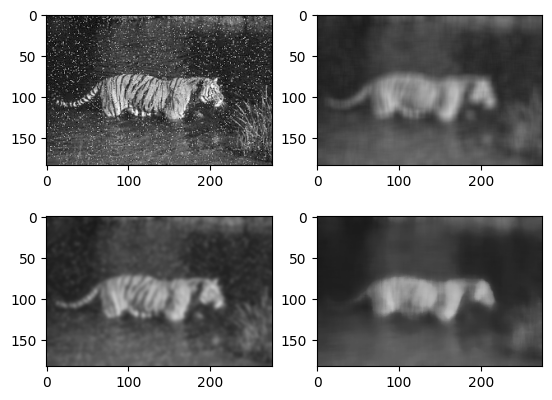

In [33]:
img_pepper01 = cv2.imread('pepper_noise02.jpg')
img_pepper01 = img_pepper01[:,:,::-1]   
DHQuan.subplot(2,2,1)
DHQuan.imshow(img_pepper01)

img_pepper01a = cv2.blur(img_pepper01, (11, 11))
DHQuan.subplot(2,2,2)
DHQuan.imshow(img_pepper01a)

img_pepper01b = cv2.GaussianBlur(img_pepper01, (11, 11), 0)
DHQuan.subplot(2,2,3)
DHQuan.imshow(img_pepper01b)

img_pepper01c = cv2.medianBlur(img_pepper01, 15)
DHQuan.subplot(2,2,4)
DHQuan.imshow(img_pepper01c)

#5. Nhận xét về các kích thước filter:
- Kernel nhỏ(3×3): giảm nhiễu ít 
- Kernel trung bình (5×5): cân bằng giữa khử nhiễu và giữ biên
- Kernel lớn (7×7): khử nhiễu mạnh nhưng làm mờ chi tiết

Với pepper noise, Median Filter cho kết quả tốt nhất, đặc biệt với kernel 5×5 hoặc 7×7
Vậy:
Box & Gaussian: không phù hợp cho pepper noise
Median: xử lý rất hiệu quả

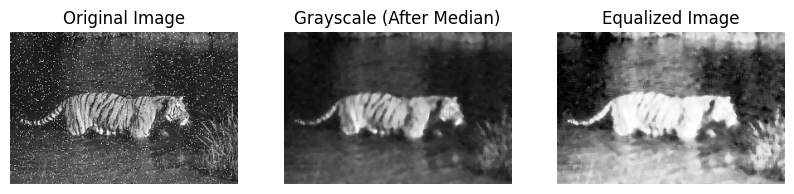

In [ ]:
#6.
import cv2
import matplotlib.pyplot as DHQuan

img = cv2.imread('pepper_noise02.jpg')

# Khử nhiễu pepper bằng Median Filter
blur = cv2.medianBlur(img, 5)

# Chuyển sang ảnh xám
gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)

# Cân bằng sáng bằng Histogram Equalization
equalized = cv2.equalizeHist(gray)

# Hiển thị kết quả
DHQuan.figure(figsize=(10,4))

DHQuan.subplot(1,3,1)
DHQuan.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
DHQuan.title("Original Image")
DHQuan.axis("off")

DHQuan.subplot(1,3,2)
DHQuan.imshow(gray, cmap='gray')
DHQuan.title("Grayscale (After Median)")
DHQuan.axis("off")

DHQuan.subplot(1,3,3)
DHQuan.imshow(equalized, cmap='gray')
DHQuan.title("Equalized Image")
DHQuan.axis("off")

DHQuan.show()


In [40]:
#7.
img = cv2.imread('pepper_noise02.jpg')
blur = cv2.medianBlur(img, 5)
blur = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)


In [37]:
img1 = cv2.imread('exT3_01.png')
img2 = cv2.imread('exT3_02.png')
img1 = img1[:155,1:191]
img2 = img2[:155,:190]
inv_img1 = cv2.bitwise_not(img1)
inv_img2 = cv2.bitwise_not(img2)

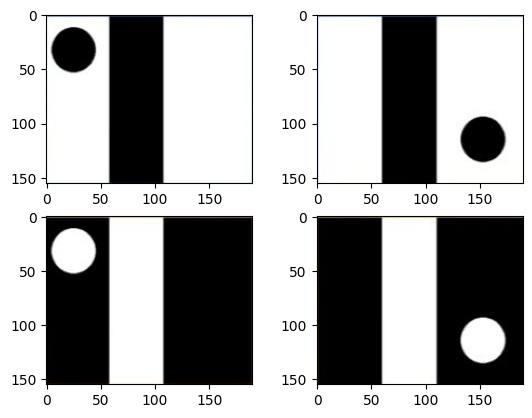

In [39]:
DHQuan.subplot(221)
DHQuan.imshow(img1[:,:,::-1])
DHQuan.subplot(222)
DHQuan.imshow(img2[:,:,::-1])
DHQuan.subplot(223)
DHQuan.imshow(inv_img1[:,:,::-1])
DHQuan.subplot(224)
DHQuan.imshow(inv_img2[:,:,::-1])

Phần bài tập mở rộng

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as DHQuan

img = cv2.imread('hinh1.jpg', cv2.IMREAD_GRAYSCALE)


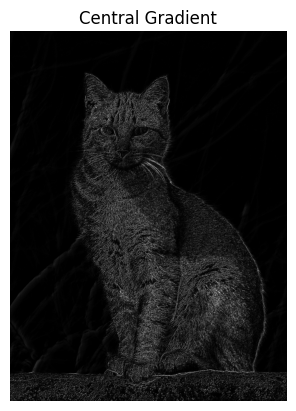

In [ ]:
#1. Backward – Forward – Central Gradient
# Forward
fx = np.array([[ -1, 1 ]], dtype=np.float32)
fy = np.array([[ -1 ], [ 1 ]], dtype=np.float32)

forward = cv2.filter2D(img, -1, fx) + cv2.filter2D(img, -1, fy)

# Backward
bx = np.array([[ 1, -1 ]], dtype=np.float32)
by = np.array([[ 1 ], [ -1 ]], dtype=np.float32)

backward = cv2.filter2D(img, -1, bx) + cv2.filter2D(img, -1, by)

# Central
cx = np.array([[ -1, 0, 1 ]], dtype=np.float32)
cy = np.array([[ -1 ], [ 0 ], [ 1 ]], dtype=np.float32)

central = cv2.filter2D(img, -1, cx) + cv2.filter2D(img, -1, cy)

DHQuan.imshow(central, cmap='gray')
DHQuan.title("Central Gradient")
DHQuan.axis("off")
DHQuan.show()


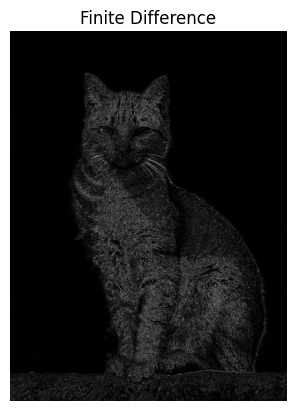

In [3]:
# 2.Finite Difference Filter (lọc nhiễu)
kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]], dtype=np.float32)

finite = cv2.filter2D(img, -1, kernel)

DHQuan.imshow(finite, cmap='gray')
DHQuan.title("Finite Difference")
DHQuan.axis("off")
DHQuan.show()


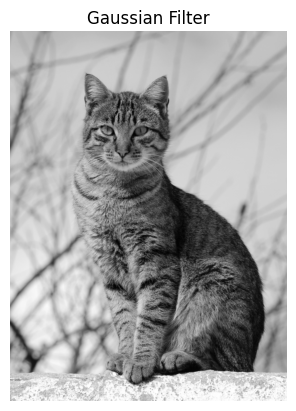

In [4]:
# 3. Gaussian Filter
gaussian = cv2.GaussianBlur(img, (5,5), 0)

DHQuan.imshow(gaussian, cmap='gray')
DHQuan.title("Gaussian Filter")
DHQuan.axis("off")
DHQuan.show()


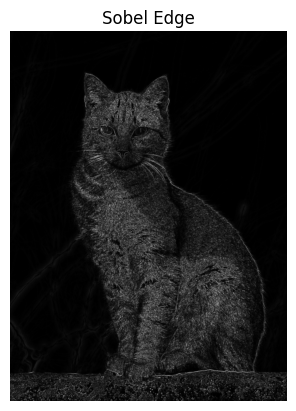

In [5]:
# 4. Sobel Detector (phát hiện biên)
sx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

sobel = cv2.magnitude(sx, sy)

DHQuan.imshow(sobel, cmap='gray')
DHQuan.title("Sobel Edge")
DHQuan.axis("off")
DHQuan.show()


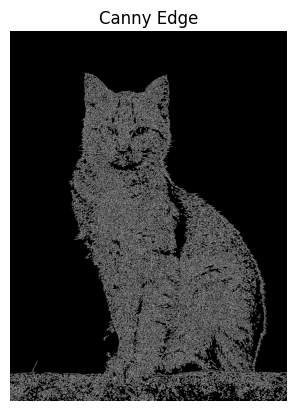

In [6]:
#5. Canny Edge Detector
canny = cv2.Canny(img, 100, 200)

DHQuan.imshow(canny, cmap='gray')
DHQuan.title("Canny Edge")
DHQuan.axis("off")
DHQuan.show()


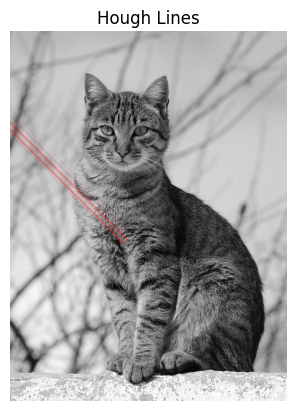

In [7]:
#6. Hough Transform (phát hiện đường thẳng)
edges = cv2.Canny(img, 100, 200)
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

hough = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for rho, theta in lines[:10,0]:
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a*rho, b*rho
        x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a))
        x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a))
        cv2.line(hough, (x1,y1), (x2,y2), (255,0,0), 1)

DHQuan.imshow(hough)
DHQuan.title("Hough Lines")
DHQuan.axis("off")
DHQuan.show()
